## Part 1
- Overview
- Demo
- Model overview
- Preloaded model & tokenizer
- Quick test

## Part 2
- Update model
- Load dataset
- Data formatting loader

## Part 3
- Training
- Testing
- Recreate demo

In [13]:
from datasets import Dataset, DatasetDict
import pandas as pd

# Read the files
file_eng_latn_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-tel_Telu/train.eng_Latn"
file_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-tel_Telu/train.tel_Telu"

with open(file_eng_latn_mal_mlym, 'r', encoding='utf-8') as f:
    en_sentences = f.readlines()

with open(file_mal_mlym, 'r', encoding='utf-8') as f:
    ml_sentences = f.readlines()

# Ensure both files have the same number of sentences
assert len(en_sentences) == len(ml_sentences), "The files have a different number of sentences."

# Create a DataFrame
data = {
    "translation": [{"en": en.strip(), "tel": ml.strip()} for en, ml in zip(en_sentences, ml_sentences)]
}
df = pd.DataFrame(data)

# Split the data into train, validation, and test sets
train_df = df.sample(frac=0.9, random_state=42)
remaining_df = df.drop(train_df.index)
valid_df = remaining_df.sample(frac=0.5, random_state=42)
test_df = remaining_df.drop(valid_df.index)

# Convert the DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df).remove_columns(['__index_level_0__'])
valid_dataset = Dataset.from_pandas(valid_df).remove_columns(['__index_level_0__'])
test_dataset = Dataset.from_pandas(test_df).remove_columns(['__index_level_0__'])

# Create a DatasetDict
dataset_dict3 = DatasetDict({
    "train": train_dataset,
    "validation": valid_dataset,
    "test": test_dataset
})

print(dataset_dict3)


DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 26753
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1486
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1487
    })
})


In [14]:
dataset_dict3['train'][9]

{'translation': {'en': 'The Dal lies within Srinagar and thus is well connected by road and air links.',
  'tel': 'దల్ శ్రీనగర్ లోపల ఉంది, అందువల్ల రహదారి మరియు వాయు మార్గాల ద్వారా బాగా అనుసంధానించబడి ఉంది.'}}

In [48]:
from datasets import DatasetDict

new_train_dataset = dataset_dict3['train'].select(range(26752))
new_validation_dataset = dataset_dict3['validation'].select(range(1000))
new_test_dataset = dataset_dict3['test'].select(range(1000))

new_dataset_dict = DatasetDict({
    'train': new_train_dataset,
    'validation': new_validation_dataset,
    'test': new_test_dataset
})
print(new_dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 26752
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1000
    })
})


In [5]:
from datasets import Dataset, DatasetDict
import pandas as pd

# Read the files
file_eng_latn_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-mal_Mlym/train.eng_Latn"
file_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-mal_Mlym/train.mal_Mlym"

with open(file_eng_latn_mal_mlym, 'r', encoding='utf-8') as f:
    en_sentences = f.readlines()

with open(file_mal_mlym, 'r', encoding='utf-8') as f:
    ml_sentences = f.readlines()

# Ensure both files have the same number of sentences
assert len(en_sentences) == len(ml_sentences), "The files have a different number of sentences."

# Create a DataFrame
data = {
    "translation": [{"en": en.strip(), "ml": ml.strip()} for en, ml in zip(en_sentences, ml_sentences)]
}
df = pd.DataFrame(data)

# Split the data into train, validation, and test sets
train_df = df.sample(frac=0.8, random_state=42)
remaining_df = df.drop(train_df.index)
valid_df = remaining_df.sample(frac=0.5, random_state=42)
test_df = remaining_df.drop(valid_df.index)

# Convert the DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df).remove_columns(['__index_level_0__'])
valid_dataset = Dataset.from_pandas(valid_df).remove_columns(['__index_level_0__'])
test_dataset = Dataset.from_pandas(test_df).remove_columns(['__index_level_0__'])

# Create a DatasetDict
dataset_dict2 = DatasetDict({
    "train": train_dataset,
    "validation": valid_dataset,
    "test": test_dataset
})

print(dataset_dict2)


DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 33297
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 4162
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 4162
    })
})


In [6]:
dataset_dict2['train'][9]

{'translation': {'en': 'Punjab has 23 districts, which are geographically classified into Majha, Malwa, Doaba and Puadh regions, as under.',
  'ml': 'ഭൂമിശാസ്ത്രപരമായി മജ, മാൽവ, ദോവാബ, പുവാദ് മേഖലകളായി തിരിച്ചിരിക്കുന്ന 23 ജില്ലകളാണ് പഞ്ചാബിൽ ഉള്ളത്.'}}

In [7]:
from datasets import Dataset, DatasetDict
import pandas as pd

# Read the files
file_eng_latn_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-tam_Taml/train.eng_Latn"
file_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-tam_Taml/train.tam_Taml"

with open(file_eng_latn_mal_mlym, 'r', encoding='utf-8') as f:
    en_sentences = f.readlines()

with open(file_mal_mlym, 'r', encoding='utf-8') as f:
    ml_sentences = f.readlines()

# Ensure both files have the same number of sentences
assert len(en_sentences) == len(ml_sentences), "The files have a different number of sentences."

# Create a DataFrame
data = {
    "translation": [{"en": en.strip(), "taml": ml.strip()} for en, ml in zip(en_sentences, ml_sentences)]
}
df = pd.DataFrame(data)

# Split the data into train, validation, and test sets
train_df = df.sample(frac=0.8, random_state=42)
remaining_df = df.drop(train_df.index)
valid_df = remaining_df.sample(frac=0.5, random_state=42)
test_df = remaining_df.drop(valid_df.index)

# Convert the DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df).remove_columns(['__index_level_0__'])
valid_dataset = Dataset.from_pandas(valid_df).remove_columns(['__index_level_0__'])
test_dataset = Dataset.from_pandas(test_df).remove_columns(['__index_level_0__'])


# Create a DatasetDict
dataset_dict = DatasetDict({
    "train": train_dataset,
    "validation": valid_dataset,
    "test": test_dataset
})

print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 16766
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2096
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2096
    })
})


In [8]:
dataset_dict['train'][9]

{'translation': {'en': 'The Sikhs, being outnumbered, withdrew to Rahon and captured its fort after defeating the Mughals in the battle of Rahon on 12 October 1710.',
  'taml': 'சீக்கியர்கள் எண்ணிக்கையில் குறைவாக இருந்ததால் ராகோனுக்குப் பின்வாங்கி, 1710 அக்டோபர் 12 அன்று ராகோன் போரில் முகலாயர்களைத் தோற்கடித்து அதன் கோட்டையைக் கைப்பற்றினர்.'}}

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

file_eng_latn_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-mal_Mlym/train.eng_Latn"
file_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-mal_Mlym/train.mal_Mlym"

with open(file_eng_latn_mal_mlym, 'r', encoding='utf-8') as f:
    eng_data = f.readlines()

with open(file_mal_mlym, 'r', encoding='utf-8') as f:
    mal_data = f.readlines()

combined_data = [
    f"{eng.strip()} #ml#> {mal.strip()}"
    for eng, mal in zip(eng_data, mal_data)
]

df = pd.DataFrame(combined_data, columns=["translations"])

train_df = df.sample(frac=0.8, random_state=42)
temp_df = df.drop(train_df.index)
validation_df = temp_df.sample(frac=0.5, random_state=42)
test_df = temp_df.drop(validation_df.index)

# Step 4: Create Dataset objects and remove the '__index_level_0__' column
train_dataset = Dataset.from_pandas(train_df).remove_columns(['__index_level_0__'])
validation_dataset = Dataset.from_pandas(validation_df).remove_columns(['__index_level_0__'])
test_dataset = Dataset.from_pandas(test_df).remove_columns(['__index_level_0__'])

# Step 5: Create a DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset,
    'test': test_dataset
})

print(dataset_dict)


In [ ]:
from datasets import DatasetDict

new_train_dataset = dataset_dict['train'].select(range(33000))
new_validation_dataset = dataset_dict['validation'].select(range(1000))
new_test_dataset = dataset_dict['test'].select(range(1000))

new_dataset_dict = DatasetDict({
    'train': new_train_dataset,
    'validation': new_validation_dataset,
    'test': new_test_dataset
})
print(new_dataset_dict)

# Download Modules

In [6]:
!pip install transformers sentencepiece datasets

In [7]:
from datasets import load_dataset
# from google.colab import drive
from IPython.display import display
# from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

In [8]:
model_repo = 'google/mt5-base'
model_path = '/content/gdrive/My Drive/mt5_translation.pt'
max_seq_len = 20

# Load Tokenizer & Model

In [17]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [18]:
# Model description: https://huggingface.co/google/mt5-base
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()

# Overview and Quick Test

In [ ]:
token_ids = tokenizer.encode(
    '<jp> This will be translated to Japanese! (hopefully)',
    return_tensors='pt').cuda()
print(token_ids)

model_out = model.generate(token_ids)
print(model_out)

output_text = tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(model_out[0]))
print(output_text)

tensor([[  1042,   3889,    669,   1494,    898,    390,  37194,    285,    288,

          30865,    309,    274, 116024,  11994,    271,      1]],

       device='cuda:0')

tensor([[     0, 250099,    259,    264,    259, 228700,      1]],

       device='cuda:0')

<pad> <extra_id_0> - issuu</s>


# Steps
1. Load the pretrained model and tokenizer
2. Load dataset
3. Transform dataset into input (entails a minor model change)
4. Train/finetune the model on our dataset
5. Test the model

# Test Tokenizer

In [ ]:
example_input_str = '<jp> This is just a test nbuig.'
# example_input_str = 'これは普通のテスト'
input_ids = tokenizer.encode(example_input_str, return_tensors='pt')
print('Input IDs:', input_ids)

tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Tokens:', tokens)

Input IDs: tensor([[1042, 3889,  669, 1494,  339, 1627,  259,  262, 2978,  259,  272, 1982,

         1315,  260,    1]])

Tokens: ['▁<', 'jp', '>', '▁This', '▁is', '▁just', '▁', 'a', '▁test', '▁', 'n', 'bu', 'ig', '.', '</s>']


# Prepare Dataset

In [ ]:
# Source: https://huggingface.co/datasets/alt
dataset = load_dataset('alt')

No config specified, defaulting to: alt/alt-parallel

Reusing dataset alt (/root/.cache/huggingface/datasets/alt/alt-parallel/1.0.0/70124cadb11e926eb17904d6edf5f79041aee772bab75a7ef37cb25633fed98f)


In [26]:
train_dataset = dataset_dict3['train']
test_dataset = dataset_dict3['test']

In [27]:
train_dataset[0]

{'translation': {'en': "He was named 'Showman of the Millennium' by Star Screen Awards in 2002.",
  'hi': "2002 में स्टार स्क्रीन अवार्ड्स द्वारा उन्हें 'सदी का प्रदर्शनकार' नामित किया गया था।"}}

In [19]:
LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'tel': '<tel>',
}

In [20]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

Embedding(250102, 768)

In [18]:
token_ids = tokenizer.encode(
    example_input_str, return_tensors='pt', padding='max_length',
    truncation=True, max_length=max_seq_len)
print(token_ids)

tokens = tokenizer.convert_ids_to_tokens(token_ids[0])
print(tokens)

NameError: name 'example_input_str' is not defined

In [21]:
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]

  # Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]

def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return token_ids[0]

def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    if formatted_data is None:
      continue

    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [22]:
# Testing `data_transform`
in_ids, out_ids = format_translation_data(
    train_dataset[0]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

# Testing data generator
data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

<tel> ▁The ▁epic ▁ describe s ▁how ▁Prince ▁Rama ▁and ▁his ▁followers ▁manage d ▁to ▁cross ▁the ▁Pal k ▁Bay ▁to ▁ reach ▁Lanka ▁( Sri ▁Lanka ) ▁to ▁save ▁S ita . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁ఈ ▁మహా కా వ ్యం ▁ యువ రాజు ▁రామ ుడు , ▁అత ని ▁అను చర ులు ▁ఎ లా ▁సీ తను ▁కాపాడ టానికి ▁పాల్ క్ ▁ బే ▁దా టి ▁ లం క ▁( శ్రీ లం క ) ▁చేర ుకున్నా రో ▁వివర ిస్తుంది . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

# Train/Finetune BERT

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [24]:
import os

# Define the path to check
directory_path = '/kaggle/working/Trans/'

# List the contents of the directory
print("Contents of the directory:", os.listdir(directory_path))

# Verify the exact path
model_path = os.path.join(directory_path, 'mt5_translation.pt')
print("Model path:", model_path)

# Load the model if the file exists
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
else:
    print("File not found at the specified path.")




Contents of the directory: []
Model path: /kaggle/working/Trans/mt5_translation.pt
File not found at the specified path.


In [23]:
import os
os.makedirs('/kaggle/working/Trans/', exist_ok=True)

In [25]:
# Constants
n_epochs = 15
batch_size = 16
print_freq = 50
checkpoint_freq = 1000
lr = 5e-4
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [26]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
losses = []

In [28]:
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

In [29]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)

  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    # Forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))

    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_dataset)
      print('Saving model with test loss of {:.3f}'.format(test_loss))
      torch.save(model.state_dict(), model_path)

torch.save(model.state_dict(), model_path)

/tmp/ipykernel_34/3548894850.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 12.107 | lr: 0.0001
Epoch: 1 | Step: 100 | Avg. loss: 5.909 | lr: 0.0002
Epoch: 1 | Step: 150 | Avg. loss: 4.608 | lr: 0.0003
Epoch: 1 | Step: 200 | Avg. loss: 3.797 | lr: 0.0004
Epoch: 1 | Step: 250 | Avg. loss: 3.221 | lr: 0.0005
Epoch: 1 | Step: 300 | Avg. loss: 3.017 | lr: 0.0004989937613201852
Epoch: 1 | Step: 350 | Avg. loss: 2.867 | lr: 0.0004979875226403703
Epoch: 1 | Step: 400 | Avg. loss: 2.762 | lr: 0.0004969812839605554
Epoch: 1 | Step: 450 | Avg. loss: 2.718 | lr: 0.0004959750452807406
Epoch: 1 | Step: 500 | Avg. loss: 2.574 | lr: 0.0004949688066009257
Epoch: 1 | Step: 550 | Avg. loss: 2.528 | lr: 0.0004939625679211109
Epoch: 1 | Step: 600 | Avg. loss: 2.442 | lr: 0.000492956329241296
Epoch: 1 | Step: 650 | Avg. loss: 2.485 | lr: 0.0004919500905614812
Epoch: 1 | Step: 700 | Avg. loss: 2.462 | lr: 0.0004909438518816663
Epoch: 1 | Step: 750 | Avg. loss: 2.338 | lr: 0.0004899376132018515
Epoch: 1 | Step: 800 | Avg. loss: 2.330 | lr: 0.00048893

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 1.892 | lr: 0.00047035620849265446
Epoch: 2 | Step: 100 | Avg. loss: 1.881 | lr: 0.0004693499698128396
Epoch: 2 | Step: 150 | Avg. loss: 1.878 | lr: 0.00046834373113302475
Epoch: 2 | Step: 200 | Avg. loss: 1.871 | lr: 0.0004673374924532099
Epoch: 2 | Step: 250 | Avg. loss: 1.814 | lr: 0.0004663312537733951
Epoch: 2 | Step: 300 | Avg. loss: 1.875 | lr: 0.00046532501509358024
Epoch: 2 | Step: 350 | Avg. loss: 1.822 | lr: 0.00046431877641376533
Epoch: 2 | Step: 400 | Avg. loss: 1.896 | lr: 0.0004633125377339505
Epoch: 2 | Step: 450 | Avg. loss: 1.806 | lr: 0.0004623062990541356
Epoch: 2 | Step: 500 | Avg. loss: 1.896 | lr: 0.0004613000603743208
Epoch: 2 | Step: 550 | Avg. loss: 1.902 | lr: 0.00046029382169450597
Epoch: 2 | Step: 600 | Avg. loss: 1.925 | lr: 0.0004592875830146911
Epoch: 2 | Step: 650 | Avg. loss: 1.818 | lr: 0.0004582813443348762
Epoch: 2 | Step: 700 | Avg. loss: 1.825 | lr: 0.00045727510565506135
Epoch: 2 | Step: 750 | Avg. loss: 1.891 | l

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 1.503 | lr: 0.0004366874622660495
Epoch: 3 | Step: 100 | Avg. loss: 1.511 | lr: 0.0004356812235862347
Epoch: 3 | Step: 150 | Avg. loss: 1.489 | lr: 0.00043467498490641984
Epoch: 3 | Step: 200 | Avg. loss: 1.567 | lr: 0.000433668746226605
Epoch: 3 | Step: 250 | Avg. loss: 1.505 | lr: 0.0004326625075467901
Epoch: 3 | Step: 300 | Avg. loss: 1.536 | lr: 0.0004316562688669752
Epoch: 3 | Step: 350 | Avg. loss: 1.532 | lr: 0.0004306500301871604
Epoch: 3 | Step: 400 | Avg. loss: 1.516 | lr: 0.00042964379150734557
Epoch: 3 | Step: 450 | Avg. loss: 1.523 | lr: 0.0004286375528275307
Epoch: 3 | Step: 500 | Avg. loss: 1.545 | lr: 0.00042763131414771586
Epoch: 3 | Step: 550 | Avg. loss: 1.582 | lr: 0.00042662507546790095
Epoch: 3 | Step: 600 | Avg. loss: 1.552 | lr: 0.00042561883678808615
Epoch: 3 | Step: 650 | Avg. loss: 1.575 | lr: 0.0004246125981082713
Epoch: 3 | Step: 700 | Avg. loss: 1.540 | lr: 0.00042360635942845644
Epoch: 3 | Step: 750 | Avg. loss: 1.509 | lr

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 1.283 | lr: 0.0004030187160394446
Epoch: 4 | Step: 100 | Avg. loss: 1.246 | lr: 0.00040201247735962973
Epoch: 4 | Step: 150 | Avg. loss: 1.274 | lr: 0.0004010062386798148
Epoch: 4 | Step: 200 | Avg. loss: 1.290 | lr: 0.0004
Epoch: 4 | Step: 250 | Avg. loss: 1.243 | lr: 0.00039899376132018516
Epoch: 4 | Step: 300 | Avg. loss: 1.283 | lr: 0.0003979875226403703
Epoch: 4 | Step: 350 | Avg. loss: 1.345 | lr: 0.00039698128396055545
Epoch: 4 | Step: 400 | Avg. loss: 1.219 | lr: 0.0003959750452807406
Epoch: 4 | Step: 450 | Avg. loss: 1.367 | lr: 0.00039496880660092574
Epoch: 4 | Step: 500 | Avg. loss: 1.310 | lr: 0.0003939625679211109
Epoch: 4 | Step: 550 | Avg. loss: 1.249 | lr: 0.00039295632924129603
Epoch: 4 | Step: 600 | Avg. loss: 1.287 | lr: 0.0003919500905614812
Epoch: 4 | Step: 650 | Avg. loss: 1.338 | lr: 0.0003909438518816663
Epoch: 4 | Step: 700 | Avg. loss: 1.328 | lr: 0.0003899376132018515
Epoch: 4 | Step: 750 | Avg. loss: 1.305 | lr: 0.00038893137

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 1.059 | lr: 0.0003693499698128396
Epoch: 5 | Step: 100 | Avg. loss: 1.068 | lr: 0.00036834373113302476
Epoch: 5 | Step: 150 | Avg. loss: 1.073 | lr: 0.0003673374924532099
Epoch: 5 | Step: 200 | Avg. loss: 1.036 | lr: 0.00036633125377339505
Epoch: 5 | Step: 250 | Avg. loss: 1.044 | lr: 0.0003653250150935802
Epoch: 5 | Step: 300 | Avg. loss: 1.061 | lr: 0.0003643187764137654
Epoch: 5 | Step: 350 | Avg. loss: 1.100 | lr: 0.0003633125377339505
Epoch: 5 | Step: 400 | Avg. loss: 1.071 | lr: 0.00036230629905413563
Epoch: 5 | Step: 450 | Avg. loss: 1.076 | lr: 0.0003613000603743208
Epoch: 5 | Step: 500 | Avg. loss: 1.096 | lr: 0.0003602938216945059
Epoch: 5 | Step: 550 | Avg. loss: 1.105 | lr: 0.0003592875830146911
Epoch: 5 | Step: 600 | Avg. loss: 1.180 | lr: 0.00035828134433487627
Epoch: 5 | Step: 650 | Avg. loss: 1.175 | lr: 0.00035727510565506136
Epoch: 5 | Step: 700 | Avg. loss: 1.231 | lr: 0.0003562688669752465
Epoch: 5 | Step: 750 | Avg. loss: 1.196 | lr

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 6 | Step: 50 | Avg. loss: 1.265 | lr: 0.00033568122358623465
Epoch: 6 | Step: 100 | Avg. loss: 1.190 | lr: 0.0003346749849064198
Epoch: 6 | Step: 150 | Avg. loss: 1.186 | lr: 0.000333668746226605
Epoch: 6 | Step: 200 | Avg. loss: 1.147 | lr: 0.00033266250754679014
Epoch: 6 | Step: 250 | Avg. loss: 1.178 | lr: 0.00033165626886697523
Epoch: 6 | Step: 300 | Avg. loss: 1.099 | lr: 0.0003306500301871604
Epoch: 6 | Step: 350 | Avg. loss: 1.169 | lr: 0.0003296437915073455
Epoch: 6 | Step: 400 | Avg. loss: 1.149 | lr: 0.0003286375528275307
Epoch: 6 | Step: 450 | Avg. loss: 1.169 | lr: 0.00032763131414771586
Epoch: 6 | Step: 500 | Avg. loss: 1.120 | lr: 0.000326625075467901
Epoch: 6 | Step: 550 | Avg. loss: 1.076 | lr: 0.0003256188367880861
Epoch: 6 | Step: 600 | Avg. loss: 1.139 | lr: 0.00032461259810827125
Epoch: 6 | Step: 650 | Avg. loss: 1.106 | lr: 0.00032360635942845644
Epoch: 6 | Step: 700 | Avg. loss: 1.062 | lr: 0.0003226001207486416
Epoch: 6 | Step: 750 | Avg. loss: 1.106 | lr:

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 7 | Step: 50 | Avg. loss: 0.785 | lr: 0.00030201247735962974
Epoch: 7 | Step: 100 | Avg. loss: 0.843 | lr: 0.0003010062386798149
Epoch: 7 | Step: 150 | Avg. loss: 0.820 | lr: 0.0003
Epoch: 7 | Step: 200 | Avg. loss: 0.846 | lr: 0.0002989937613201851
Epoch: 7 | Step: 250 | Avg. loss: 0.853 | lr: 0.0002979875226403703
Epoch: 7 | Step: 300 | Avg. loss: 0.862 | lr: 0.00029698128396055546
Epoch: 7 | Step: 350 | Avg. loss: 0.841 | lr: 0.0002959750452807406
Epoch: 7 | Step: 400 | Avg. loss: 0.873 | lr: 0.00029496880660092575
Epoch: 7 | Step: 450 | Avg. loss: 0.865 | lr: 0.00029396256792111084
Epoch: 7 | Step: 500 | Avg. loss: 0.856 | lr: 0.00029295632924129604
Epoch: 7 | Step: 550 | Avg. loss: 0.893 | lr: 0.0002919500905614812
Epoch: 7 | Step: 600 | Avg. loss: 0.847 | lr: 0.00029094385188166633
Epoch: 7 | Step: 650 | Avg. loss: 0.873 | lr: 0.0002899376132018515
Epoch: 7 | Step: 700 | Avg. loss: 0.852 | lr: 0.0002889313745220367
Epoch: 7 | Step: 750 | Avg. loss: 0.880 | lr: 0.0002879251

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 8 | Step: 50 | Avg. loss: 0.676 | lr: 0.0002683437311330247
Epoch: 8 | Step: 100 | Avg. loss: 0.653 | lr: 0.0002673374924532099
Epoch: 8 | Step: 150 | Avg. loss: 0.699 | lr: 0.00026633125377339506
Epoch: 8 | Step: 200 | Avg. loss: 0.677 | lr: 0.0002653250150935802
Epoch: 8 | Step: 250 | Avg. loss: 0.656 | lr: 0.00026431877641376535
Epoch: 8 | Step: 300 | Avg. loss: 0.692 | lr: 0.0002633125377339505
Epoch: 8 | Step: 350 | Avg. loss: 0.668 | lr: 0.00026230629905413564
Epoch: 8 | Step: 400 | Avg. loss: 0.662 | lr: 0.0002613000603743208
Epoch: 8 | Step: 450 | Avg. loss: 0.674 | lr: 0.00026029382169450593
Epoch: 8 | Step: 500 | Avg. loss: 0.661 | lr: 0.0002592875830146911
Epoch: 8 | Step: 550 | Avg. loss: 0.646 | lr: 0.0002582813443348762
Epoch: 8 | Step: 600 | Avg. loss: 0.732 | lr: 0.0002572751056550614
Epoch: 8 | Step: 650 | Avg. loss: 0.679 | lr: 0.00025626886697524657
Epoch: 8 | Step: 700 | Avg. loss: 0.725 | lr: 0.00025526262829543166
Epoch: 8 | Step: 750 | Avg. loss: 0.670 | l

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 9 | Step: 50 | Avg. loss: 0.495 | lr: 0.0002346749849064198
Epoch: 9 | Step: 100 | Avg. loss: 0.514 | lr: 0.00023366874622660495
Epoch: 9 | Step: 150 | Avg. loss: 0.515 | lr: 0.00023266250754679012
Epoch: 9 | Step: 200 | Avg. loss: 0.502 | lr: 0.00023165626886697524
Epoch: 9 | Step: 250 | Avg. loss: 0.491 | lr: 0.0002306500301871604
Epoch: 9 | Step: 300 | Avg. loss: 0.514 | lr: 0.00022964379150734556
Epoch: 9 | Step: 350 | Avg. loss: 0.528 | lr: 0.00022863755282753067
Epoch: 9 | Step: 400 | Avg. loss: 0.543 | lr: 0.00022763131414771585
Epoch: 9 | Step: 450 | Avg. loss: 0.465 | lr: 0.000226625075467901
Epoch: 9 | Step: 500 | Avg. loss: 0.523 | lr: 0.00022561883678808614
Epoch: 9 | Step: 550 | Avg. loss: 0.489 | lr: 0.00022461259810827128
Epoch: 9 | Step: 600 | Avg. loss: 0.496 | lr: 0.00022360635942845645
Epoch: 9 | Step: 650 | Avg. loss: 0.500 | lr: 0.00022260012074864157
Epoch: 9 | Step: 700 | Avg. loss: 0.500 | lr: 0.00022159388206882672
Epoch: 9 | Step: 750 | Avg. loss: 0.522

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 10 | Step: 50 | Avg. loss: 0.367 | lr: 0.00020100623867981486
Epoch: 10 | Step: 100 | Avg. loss: 0.384 | lr: 0.0002
Epoch: 10 | Step: 150 | Avg. loss: 0.391 | lr: 0.00019899376132018515
Epoch: 10 | Step: 200 | Avg. loss: 0.393 | lr: 0.0001979875226403703
Epoch: 10 | Step: 250 | Avg. loss: 0.371 | lr: 0.00019698128396055544
Epoch: 10 | Step: 300 | Avg. loss: 0.376 | lr: 0.0001959750452807406
Epoch: 10 | Step: 350 | Avg. loss: 0.372 | lr: 0.00019496880660092576
Epoch: 10 | Step: 400 | Avg. loss: 0.399 | lr: 0.00019396256792111088
Epoch: 10 | Step: 450 | Avg. loss: 0.397 | lr: 0.00019295632924129605
Epoch: 10 | Step: 500 | Avg. loss: 0.391 | lr: 0.0001919500905614812
Epoch: 10 | Step: 550 | Avg. loss: 0.405 | lr: 0.00019094385188166631
Epoch: 10 | Step: 600 | Avg. loss: 0.371 | lr: 0.00018993761320185149
Epoch: 10 | Step: 650 | Avg. loss: 0.416 | lr: 0.00018893137452203663
Epoch: 10 | Step: 700 | Avg. loss: 0.391 | lr: 0.00018792513584222178
Epoch: 10 | Step: 750 | Avg. loss: 0.386

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 11 | Step: 50 | Avg. loss: 0.275 | lr: 0.0001673374924532099
Epoch: 11 | Step: 100 | Avg. loss: 0.248 | lr: 0.00016633125377339507
Epoch: 11 | Step: 150 | Avg. loss: 0.288 | lr: 0.0001653250150935802
Epoch: 11 | Step: 200 | Avg. loss: 0.256 | lr: 0.00016431877641376536
Epoch: 11 | Step: 250 | Avg. loss: 0.246 | lr: 0.0001633125377339505
Epoch: 11 | Step: 300 | Avg. loss: 0.262 | lr: 0.00016230629905413562
Epoch: 11 | Step: 350 | Avg. loss: 0.266 | lr: 0.0001613000603743208
Epoch: 11 | Step: 400 | Avg. loss: 0.265 | lr: 0.00016029382169450594
Epoch: 11 | Step: 450 | Avg. loss: 0.263 | lr: 0.00015928758301469108
Epoch: 11 | Step: 500 | Avg. loss: 0.260 | lr: 0.00015828134433487623
Epoch: 11 | Step: 550 | Avg. loss: 0.235 | lr: 0.0001572751056550614
Epoch: 11 | Step: 600 | Avg. loss: 0.243 | lr: 0.00015626886697524652
Epoch: 11 | Step: 650 | Avg. loss: 0.281 | lr: 0.00015526262829543166
Epoch: 11 | Step: 700 | Avg. loss: 0.273 | lr: 0.00015425638961561684
Epoch: 11 | Step: 750 | Av

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 12 | Step: 50 | Avg. loss: 0.170 | lr: 0.00013366874622660496
Epoch: 12 | Step: 100 | Avg. loss: 0.180 | lr: 0.0001326625075467901
Epoch: 12 | Step: 150 | Avg. loss: 0.181 | lr: 0.00013165626886697525
Epoch: 12 | Step: 200 | Avg. loss: 0.201 | lr: 0.0001306500301871604
Epoch: 12 | Step: 250 | Avg. loss: 0.178 | lr: 0.00012964379150734554
Epoch: 12 | Step: 300 | Avg. loss: 0.188 | lr: 0.0001286375528275307
Epoch: 12 | Step: 350 | Avg. loss: 0.187 | lr: 0.00012763131414771583
Epoch: 12 | Step: 400 | Avg. loss: 0.171 | lr: 0.000126625075467901
Epoch: 12 | Step: 450 | Avg. loss: 0.185 | lr: 0.00012561883678808614
Epoch: 12 | Step: 500 | Avg. loss: 0.201 | lr: 0.0001246125981082713
Epoch: 12 | Step: 550 | Avg. loss: 0.208 | lr: 0.00012360635942845643
Epoch: 12 | Step: 600 | Avg. loss: 0.212 | lr: 0.00012260012074864158
Epoch: 12 | Step: 650 | Avg. loss: 0.218 | lr: 0.00012159388206882672
Epoch: 12 | Step: 700 | Avg. loss: 0.186 | lr: 0.00012058764338901187
Epoch: 12 | Step: 750 | Avg

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 13 | Step: 50 | Avg. loss: 0.121 | lr: 0.0001
Epoch: 13 | Step: 100 | Avg. loss: 0.109 | lr: 9.899376132018515e-05
Epoch: 13 | Step: 150 | Avg. loss: 0.116 | lr: 9.79875226403703e-05
Epoch: 13 | Step: 200 | Avg. loss: 0.123 | lr: 9.698128396055544e-05
Epoch: 13 | Step: 250 | Avg. loss: 0.120 | lr: 9.59750452807406e-05
Epoch: 13 | Step: 300 | Avg. loss: 0.137 | lr: 9.496880660092574e-05
Epoch: 13 | Step: 350 | Avg. loss: 0.115 | lr: 9.396256792111089e-05
Epoch: 13 | Step: 400 | Avg. loss: 0.120 | lr: 9.295632924129603e-05
Epoch: 13 | Step: 450 | Avg. loss: 0.133 | lr: 9.195009056148118e-05
Epoch: 13 | Step: 500 | Avg. loss: 0.128 | lr: 9.094385188166634e-05
Epoch: 13 | Step: 550 | Avg. loss: 0.135 | lr: 8.993761320185148e-05
Epoch: 13 | Step: 600 | Avg. loss: 0.121 | lr: 8.893137452203663e-05
Epoch: 13 | Step: 650 | Avg. loss: 0.121 | lr: 8.792513584222179e-05
Epoch: 13 | Step: 700 | Avg. loss: 0.122 | lr: 8.691889716240692e-05
Epoch: 13 | Step: 750 | Avg. loss: 0.120 | lr: 8.591

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 14 | Step: 50 | Avg. loss: 0.093 | lr: 6.633125377339505e-05
Epoch: 14 | Step: 100 | Avg. loss: 0.093 | lr: 6.53250150935802e-05
Epoch: 14 | Step: 150 | Avg. loss: 0.076 | lr: 6.431877641376536e-05
Epoch: 14 | Step: 200 | Avg. loss: 0.084 | lr: 6.33125377339505e-05
Epoch: 14 | Step: 250 | Avg. loss: 0.062 | lr: 6.230629905413564e-05
Epoch: 14 | Step: 300 | Avg. loss: 0.083 | lr: 6.130006037432079e-05
Epoch: 14 | Step: 350 | Avg. loss: 0.085 | lr: 6.0293821694505935e-05
Epoch: 14 | Step: 400 | Avg. loss: 0.080 | lr: 5.928758301469109e-05
Epoch: 14 | Step: 450 | Avg. loss: 0.077 | lr: 5.828134433487623e-05
Epoch: 14 | Step: 500 | Avg. loss: 0.072 | lr: 5.727510565506138e-05
Epoch: 14 | Step: 550 | Avg. loss: 0.074 | lr: 5.626886697524653e-05
Epoch: 14 | Step: 600 | Avg. loss: 0.072 | lr: 5.526262829543167e-05
Epoch: 14 | Step: 650 | Avg. loss: 0.077 | lr: 5.4256389615616825e-05
Epoch: 14 | Step: 700 | Avg. loss: 0.079 | lr: 5.325015093580198e-05
Epoch: 14 | Step: 750 | Avg. loss: 

  0%|          | 0/1673 [00:00<?, ?it/s]

Epoch: 15 | Step: 50 | Avg. loss: 0.047 | lr: 3.26625075467901e-05
Epoch: 15 | Step: 100 | Avg. loss: 0.052 | lr: 3.165626886697525e-05
Epoch: 15 | Step: 150 | Avg. loss: 0.053 | lr: 3.0650030187160395e-05
Epoch: 15 | Step: 200 | Avg. loss: 0.047 | lr: 2.9643791507345543e-05
Epoch: 15 | Step: 250 | Avg. loss: 0.045 | lr: 2.863755282753069e-05
Epoch: 15 | Step: 300 | Avg. loss: 0.040 | lr: 2.7631314147715837e-05
Epoch: 15 | Step: 350 | Avg. loss: 0.047 | lr: 2.662507546790099e-05
Epoch: 15 | Step: 400 | Avg. loss: 0.043 | lr: 2.5618836788086133e-05
Epoch: 15 | Step: 450 | Avg. loss: 0.055 | lr: 2.4612598108271282e-05
Epoch: 15 | Step: 500 | Avg. loss: 0.034 | lr: 2.360635942845643e-05
Epoch: 15 | Step: 550 | Avg. loss: 0.050 | lr: 2.260012074864158e-05
Epoch: 15 | Step: 600 | Avg. loss: 0.059 | lr: 2.1593882068826727e-05
Epoch: 15 | Step: 650 | Avg. loss: 0.045 | lr: 2.0587643389011875e-05
Epoch: 15 | Step: 700 | Avg. loss: 0.042 | lr: 1.958140470919702e-05
Epoch: 15 | Step: 750 | Avg. 

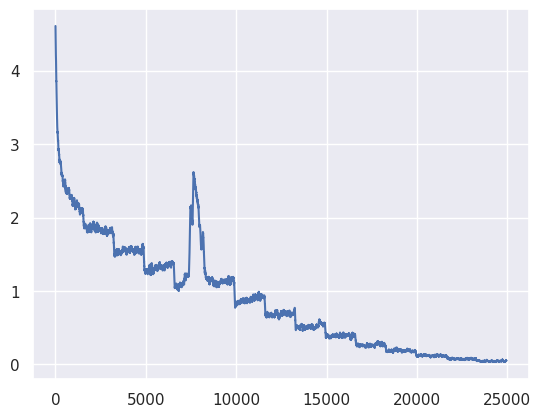

In [30]:
# Graph the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

In [31]:
model.save_pretrained('./Trans2')
# Save the tokenizer
tokenizer.save_pretrained('./Trans2')

('./Trans2/tokenizer_config.json',
 './Trans2/special_tokens_map.json',
 './Trans2/spiece.model',
 './Trans2/added_tokens.json',
 './Trans2/tokenizer.json')

In [32]:
import shutil

shutil.make_archive('mt5modelFinalEn-Tel', 'zip', '/kaggle/working/Trans2')

'/kaggle/working/mt5modelFinalEn-Tel.zip'

In [33]:
from IPython.display import FileLink
FileLink(r'mt5modelFinalEn-Tel.zip')

/kaggle/working/mt5modelFinalEn-Tel.zip

# Manual Testing

In [35]:
test_sentence = dataset_dict3['validation'][0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'tel',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: The Pandyas entered their golden age under Maravarman I and Jatavarman Sundara Pandya I (13th century).
Truncated input text: <tel> The Pandyas entered their golden age under Maravarman I and Ja</s>


In [36]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


మొదటి మారవర్మన్ మరియు రెండవ మారవర్మన్ ఆధ్వర్యంలో పాండ్యు
మొదటి మారవర్మన్ మరియు రెండవ మారవర్మన్ ల ఆధ్వర్యంలో పా
మొదటి మారవర్మన్ ఆధ్వర్యంలో పాండ్యులు తమ బంగారు 


In [44]:
test_sentence = test_dataset[0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'hi',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: Before the British established a colony on Andaman, the Sisters were visited occasionally by the Onge people of Little Andaman Island for fishing.
Truncated input text: <hi> Before the British established a colony on Andaman, the Sisters</s>


In [45]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


अंग्रेजों द्वारा अंडमान पर एक उपनिवेश स्थापित करने
अंग्रेज़ों द्वारा अंडमान पर एक उपनिवेश स्थापित करने
अंग्रेजों द्वारा अंडमान पर एक उपनिवेश स्थापित शुरू


In [37]:
def translate(input_text, output_language, model, tokenizer, lang_token_map):
    input_ids = encode_input_str(
        text = input_text,
        target_lang = output_language,
        tokenizer = tokenizer,
        seq_len = model.config.max_length,
        lang_token_map = lang_token_map)
    input_ids = input_ids.unsqueeze(0).cuda()
    output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
    return tokenizer.decode(output_tokens[0], skip_special_tokens=True)

In [51]:
def translator(src_text, target_lang, model, tokenizer, lang_token_map):
    # Tokenize the input text
    input_ids = encode_input_str(src_text, target_lang, tokenizer, max_seq_len, lang_token_map).unsqueeze(0).cuda()

    # Generate translation using the model
    with torch.no_grad():
        outputs = model.generate(input_ids, max_length=max_seq_len)
    
    # Decode the output
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_text

In [59]:
input_text = 'आज मौसम बहुत अच्छा है।'
output_language = 'en'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


The weather is very nice today.


In [39]:
input_text = 'అతను విద్యార్థిగా ప్రత్యేక ప్రమాణాలను సంపాదించాడు.'
output_language = 'en'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

He had a few traits as a student.


In [40]:
input_text = 'నేను ప్రతిష్ట నిధి ప్రణాళికను అభ్యర్థిస్తున్నాను. '
output_language = 'en'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


I would like to submit a tax relief plan.


In [41]:
input_text = 'ముందుకు వెళ్ళుతున్నాను, నా ప్రారంభ కార్యాన్ని పూర్తి చేయండి. '
output_language = 'en'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

Just go, finish my initial venture.


In [43]:
input_text = 'Go to this with important messages.'
output_language = 'tel'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

ముఖ్యమైన సందేశాలతో దీనికై వెళ్ళండి.


In [44]:
input_text = 'it was nice to meet you'
output_language = 'tel'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

మీతో కలవటం అనేది మంచి విషయం.


In [53]:
input_text = 'आज मौसम बहुत अच्छा है।'
output_language = 'en'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

The weather is very nice today.


In [54]:
input_text = 'यह किताब मुझे बहुत पसंद है।'
output_language = 'en'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

This book I really like.


In [38]:
input_text = 'He loves his parents.'
output_language = 'tel'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

NameError: name 'translator' is not defined

In [45]:
!pip install evaluate sacrebleu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 7.1 MB/s eta 0:00:00


In [46]:
import evaluate
import torch

import sacrebleu
import evaluate

# Load evaluation metrics
sacrebleu_metric = evaluate.load("sacrebleu")
chrf_metric = evaluate.load("chrf")
ter_metric = sacrebleu.metrics.TER()

# Define the postprocess_text function
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]
    return preds, labels

# Define the compute_metrics function
def compute_metrics(decoded_preds, decoded_labels):
    # Post-process the decoded predictions and labels
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    # Compute BLEU score
    sacrebleu_result = sacrebleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_score = sacrebleu_result['score']

    # Compute CHRF score
    chrf_result = chrf_metric.compute(predictions=decoded_preds, references=decoded_labels)
    chrf_score = chrf_result['score']

    # Compute TER score using sacrebleu
    ter_score = ter_metric.corpus_score(decoded_preds, [decoded_labels]).score

    # Create the result dictionary
    result = {
        'bleu': round(bleu_score, 4),
        'chrf': round(chrf_score, 4),
        'ter': round(ter_score, 4)
    }
   
    return result

2024-07-04 08:54:32.227497: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 08:54:32.227589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 08:54:32.364321: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [82]:
from nltk.translate.bleu_score import corpus_bleu

def bleu_score2(tgt_texts, trans_texts):
    bleu_dic = {}
    bleu_dic['1-grams'] = corpus_bleu(tgt_texts, trans_texts, weights=(1.0, 0, 0, 0))
    bleu_dic['1-2-grams'] = corpus_bleu(tgt_texts, trans_texts, weights=(0.5, 0.5, 0, 0))
    bleu_dic['1-3-grams'] = corpus_bleu(tgt_texts, trans_texts, weights=(0.3, 0.3, 0.3, 0))
    bleu_dic['1-4-grams'] = corpus_bleu(tgt_texts, trans_texts, weights=(0.25, 0.25, 0.25, 0.25))
    
    average_bleu = sum(bleu_dic.values()) / len(bleu_dic)
    bleu_dic['average'] = average_bleu
    
    return bleu_dic

In [49]:
val_data = new_dataset_dict['test']

In [63]:
val_data[7]

{'translation': {'en': 'With an antiquity that dates to the palaeolithic, Karnataka has been home to some of the most powerful empires of ancient and medieval India.',
  'hi': 'कर्नाटक का इतिहास पुरापाषाण काल से चलता आया है और यहाँ प्राचीन और मध्यकालीन भारत के सबसे शक्तिशाली साम्राज्यों में से कुछ उभर आए।'}}

In [55]:
def translate_texts(translator, dataset):
    tgt_texts, trans_texts = [], []

    for data in dataset:
        src_text = data['translation']['tel']
        tgt_text = data['translation']['en']
        translated_text = translator(src_text, 'en', model, tokenizer, LANG_TOKEN_MAPPING)  # Assuming 'hi' for Hindi
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

In [56]:
tgt_texts2, trans_texts2 = translate_texts(translate, val_data)

In [51]:
tgt_texts1, trans_texts1 = translate_texts(translate, val_data)

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [52]:
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]
    return preds, labels

# Define the compute_metrics function
def compute_metrics(decoded_preds, decoded_labels):
    # Post-process the decoded predictions and labels
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    # Compute BLEU score
    sacrebleu_result = sacrebleu_metric.compute(predictions=decoded_preds, references=[[label] for label in decoded_labels])


    bleu_score = sacrebleu_result['score']

    # Compute CHRF score
    chrf_result = chrf_metric.compute(predictions=decoded_preds, references=decoded_labels)
    chrf_score = chrf_result['score']

    # Compute TER score using sacrebleu
    ter_score = ter_metric.corpus_score(decoded_preds, [decoded_labels]).score

    # Create the result dictionary
    result = {
        'bleu': round(bleu_score, 4),
        'chrf': round(chrf_score, 4),
        'ter': round(ter_score, 4)
    }
   
    return result

In [57]:
metrics2 = compute_metrics(tgt_texts2, trans_texts2)

In [58]:
metrics2

{'bleu': 11.2926, 'chrf': 39.9509, 'ter': 123.5309}

In [53]:
metrics = compute_metrics(tgt_texts1, trans_texts1)

In [54]:
metrics

{'bleu': 7.2115, 'chrf': 43.6234, 'ter': 159.9515}

In [83]:
bleu_score2(tgt_texts1, trans_texts1)

/opt/conda/lib/python3.10/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


{'1-grams': 0.4497116420558971,
 '1-2-grams': 0.6706054294858468,
 '1-3-grams': 0.7868287843089313,
 '1-4-grams': 0.8189050185985227,
 'average': 0.6815127186122995}

In [61]:
#@title Slick Blue Translate
input_text = 'A surfboarder ran into a shark' #@param {type:"string"}
output_language = 'hi' #@param ["en", "ja", "zh"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))

A surfboarder ran into a shark  ->  एक हर्फ़बॉलर समुद्र में डूबने के कारण एक ज्
